In [1]:
import control as ct
import matplotlib.pyplot as plt
import numpy as np

Define a lightly damped PT2 system

In [2]:
wn = 5        # natural frequency
zeta = 0.2    # damping ratio

Open-loop transfer function

In [3]:
G = ct.tf([wn**2], [1, 2*zeta*wn, wn**2])

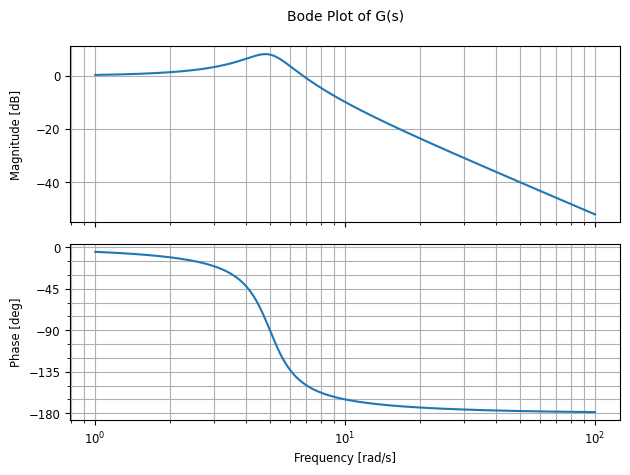

In [4]:
ct.bode_plot(G, dB=True, grid=True, title="Bode Plot of G(s)")

Compute gain and phase margins

In [5]:
gm, pm, wg, wp = ct.margin(G)

print("Gain Margin (linear):", gm)
print("Gain Margin (dB):", 20*np.log10(gm))
print("Phase Margin (deg):", pm)
print("Gain crossover frequency (rad/s):", wg)
print("Phase crossover frequency (rad/s):", wp)

Gain Margin (linear): inf
Gain Margin (dB): inf
Phase Margin (deg): 32.8598803788891
Gain crossover frequency (rad/s): nan
Phase crossover frequency (rad/s): 6.782329983125268


For this lightly damped system, the phase never actually reaches −180° within the plotted or computed range (or at least at a finite frequency where magnitude is also meaningful).

Add a Right-Half-Plane zero

The feedback system is more stable (larger margins, easier to control) if the RHP zero is further to the right. A RHP zero close to the imaginary axis is more destabilizing than one far away.

In [6]:
zr = 5  # location of RHP zero
# zr = 15  # location of RHP zero
G_rhp = G * ct.tf([1, -zr], [1])  # RHP zero: s - zr

In [7]:
def normalize_dc_gain(sys):
    dc = ct.dcgain(sys)
    return sys / dc

G = normalize_dc_gain(G)
G_rhp  = normalize_dc_gain(G_rhp)

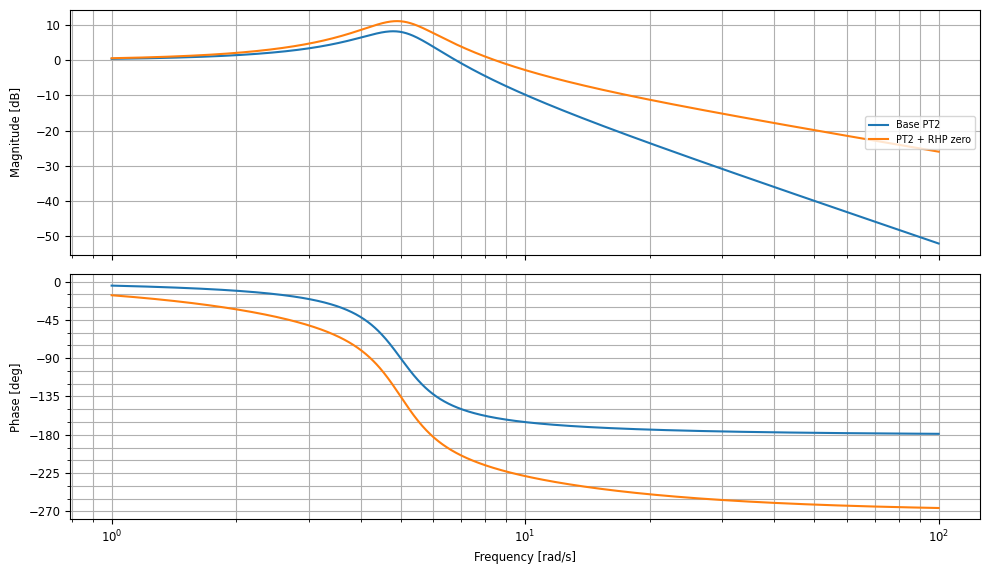

In [8]:
plt.figure(figsize=(10,6))

ct.bode_plot(G, dB=True, grid=True, label='Base PT2')
ct.bode_plot(G_rhp, dB=True, grid=True, label='PT2 + RHP zero', wrap_phase=False)

Compute gain and phase margins

In [9]:
gm_base, pm_base, wg_base, wp_base = ct.margin(G)
gm_rhp, pm_rhp, wg_rhp, wp_rhp = ct.margin(G_rhp)

print("Base PT2 system:")
print(f"  Phase Margin = {pm_base:.2f} deg")
print(f"  Gain Margin  = {20*np.log10(gm_base):.2f} dB")
print(f"  ω_gc = {wg_base:.2f} rad/s, ω_pc = {wp_base:.2f} rad/s")

print("\nPT2 + RHP zero system:")
print(f"  Phase Margin = {pm_rhp:.2f} deg")
print(f"  Gain Margin  = {20*np.log10(gm_rhp):.2f} dB")
print(f"  ω_gc = {wg_rhp:.2f} rad/s, ω_pc = {wp_rhp:.2f} rad/s")

Base PT2 system:
  Phase Margin = 32.86 deg
  Gain Margin  = inf dB
  ω_gc = nan rad/s, ω_pc = 6.78 rad/s

PT2 + RHP zero system:
  Phase Margin = -39.19 deg
  Gain Margin  = -7.96 dB
  ω_gc = 5.92 rad/s, ω_pc = 8.43 rad/s


Adding a RHP zero introduces extra phase lag. Now the phase does cross −180° at some finite ω_pc. Magnitude at that frequency is finite. Gain margin becomes finite. This is exactly why RHP zeros are dangerous: magnitude alone doesn’t change much, but phase lag reduces the margin.

Compute Bode plots manually

In [10]:
omega = np.logspace(-1, 2, 1000)  # frequency range: 0.1 to 100 rad/s
mag, phase, omega = ct.frequency_response(G_rhp, omega)

mag_db = 20 * np.log10(abs(mag))
phase_deg = np.unwrap(phase) * 180/np.pi

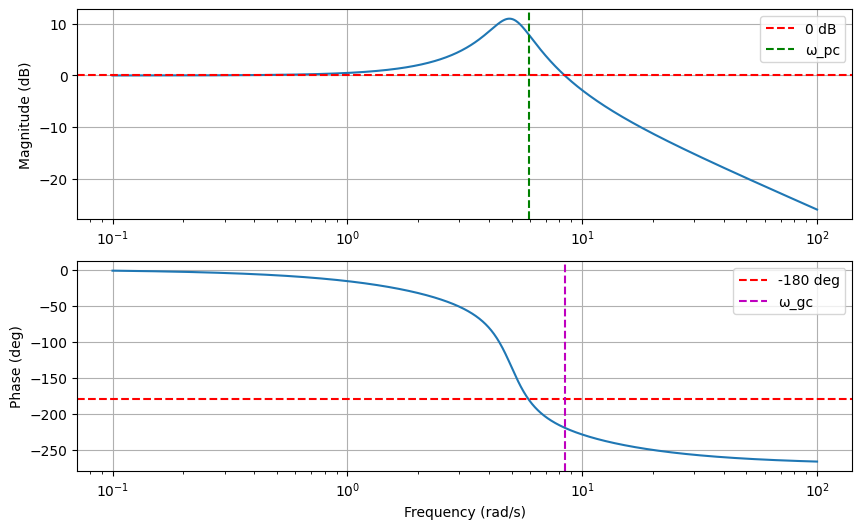

In [11]:
plt.figure(figsize=(10,6))
plt.subplot(2,1,1)
plt.semilogx(omega, mag_db)
plt.axhline(0, color='r', linestyle='--', label='0 dB')
plt.axvline(wg_rhp, color='g', linestyle='--', label='ω_pc')
plt.grid(True)
plt.ylabel("Magnitude (dB)")
plt.legend()

plt.subplot(2,1,2)
plt.semilogx(omega, phase_deg)
plt.axhline(-180, color='r', linestyle='--', label='-180 deg')
plt.axvline(wp_rhp, color='m', linestyle='--', label='ω_gc')
plt.grid(True)
plt.xlabel("Frequency (rad/s)")
plt.ylabel("Phase (deg)")
plt.legend()
plt.show()

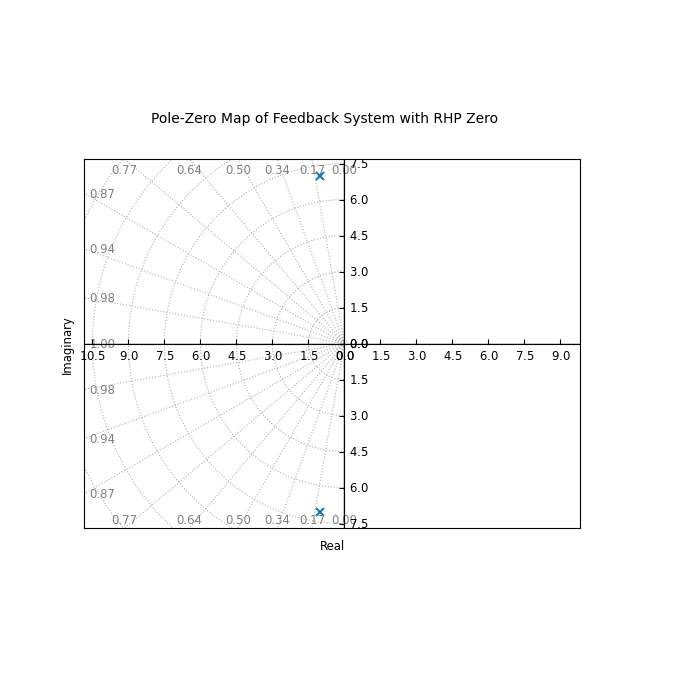

In [12]:
T_rhp = ct.feedback(G, 1)
ct.pzmap(T_rhp, grid=True, title="Pole-Zero Map of Feedback System with RHP Zero")

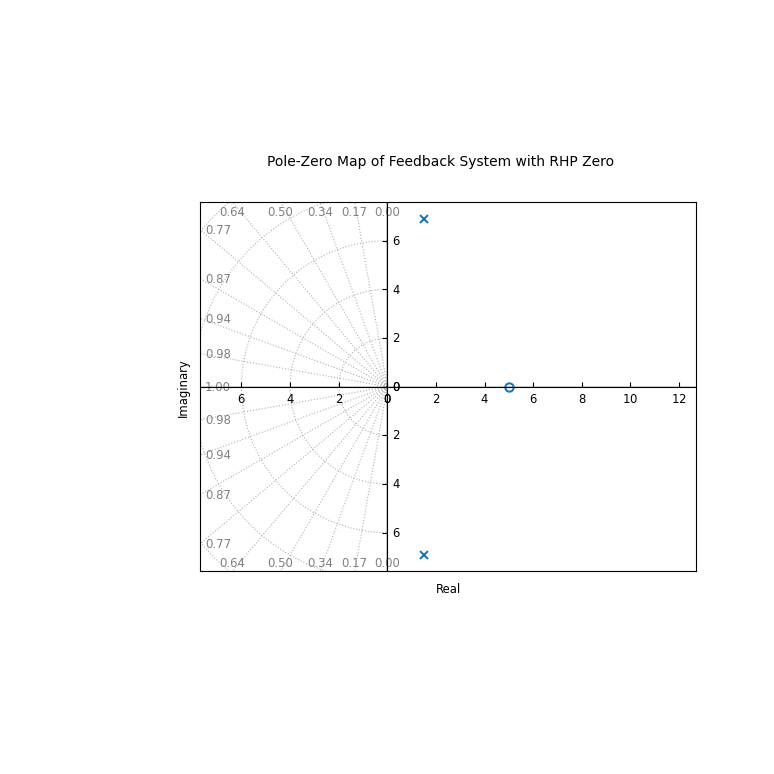

In [13]:
T_rhp = ct.feedback(G_rhp, 1)
ct.pzmap(T_rhp, grid=True, title="Pole-Zero Map of Feedback System with RHP Zero")

Nyquist plot

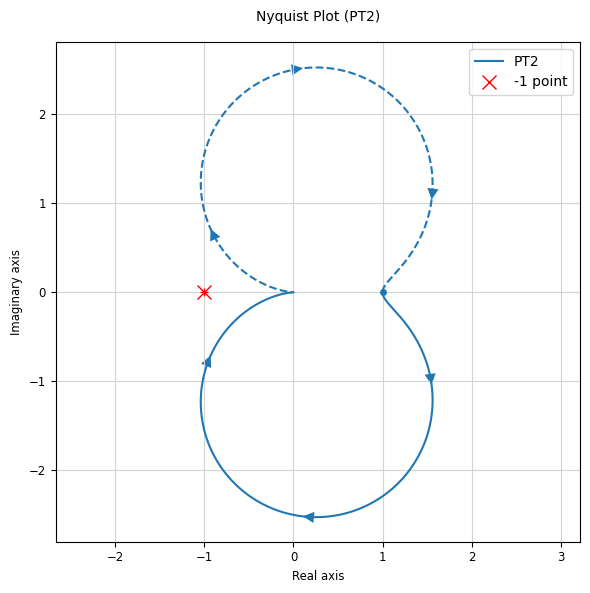

In [14]:
plt.figure(figsize=(6,6))

ct.nyquist_plot(G, omega=np.logspace(-2, 2, 2000), title="Nyquist Plot (PT2)", label='PT2')

# Mark critical point -1
plt.plot(-1, 0, 'rx', markersize=10, label='-1 point')

plt.grid(True)
plt.axis('equal')
plt.legend()
plt.show()

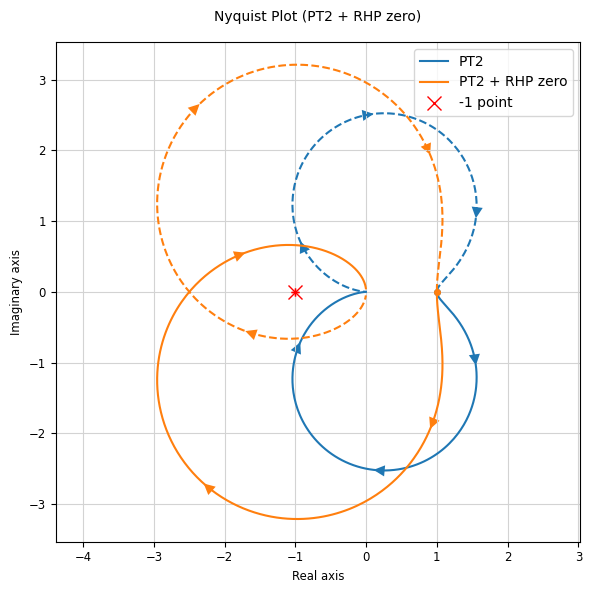

In [15]:
plt.figure(figsize=(6,6))

ct.nyquist_plot(G, omega=np.logspace(-2, 2, 2000), title="Nyquist Plot (PT2)", label='PT2')
ct.nyquist_plot(G_rhp, omega=np.logspace(-2, 2, 2000), title="Nyquist Plot (PT2 + RHP zero)", label='PT2 + RHP zero')

# Mark critical point -1
plt.plot(-1, 0, 'rx', markersize=10, label='-1 point')

plt.grid(True)
plt.axis('equal')
plt.legend()
plt.show()